In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=3


In [2]:
data = pd.read_csv("allnews.csv")
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 38053


In [3]:
data.head()

,신문사,분류,제목,본문,날짜 및 시간
0,프레시안,경제,뉴라운드 협상 이제부터다 - WTO 국민연대 장원석 집행위원장의 협상 참관기,지난 11월 9일부터 14일까지 카타르 도하에서 열린 세계무역기구(WTO) 각료...,['2001-11-21 09:53:00']
1,프레시안,세계,"미, 이슬람권 대상 방송국 설립 추진 - 본격 선전전 나서",미 정부가 아랍권 여론 장악을 위해 5억달러를 들여 위성방송국 설립을 추진중인 ...,['2001-11-21 09:53:00']
2,프레시안,정치,개혁신당 운동 젊은 의원들이 밀어붙여라 - 이부영 한나라당 부총재 인터뷰,한나라당 이부영 부총재는 19일 프레시안과 인터뷰를 갖고 개혁신당 운동에 대해 ...,['2001-11-21 09:53:00']
3,프레시안,세계,잊혀진 나라 '아프간' <6ㆍ끝> - 누가 이 전쟁을 멈출 것인가,아프간의 기아 참상을 영화로 찍기 위해 방글라데시 유엔 대표인 카말 후세인 박사...,['2001-11-20 10:01:00']
4,프레시안,세계,"미국, 고문 합법화. 비밀재판 추진 - ""미국이외는 야만이라는 미국의 야만적 사고""",“테러범들에 대한 고문을 합법화해야 한다.”\n “테러범들은 비밀리에 항공모함...,['2001-11-20 10:01:00']


In [4]:
data = data[['본문','제목']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,본문,제목
1479,【서울=뉴시스】\n\n법원이 증거능력이 부족하다며 아동성폭력 사건 중 처음으로 피해...,(서울)법정에 출석하지 않은 성추행 아동 진술은 증거능력 없어
7964,"▲25일 오후 2시 13분에 송고된 연합 G1-0555 ,H1-0555,L1-016...",<고침>--남북관계
24184,"굿데이가 그동안 사진부를 아웃소싱으로 운영해오다 사진의 질적 저하, 경쟁력 약화 등...",굿데이 사진부 아웃소싱 포기
4468,(카이로=연합뉴스) 이기창특파원 = 쿠웨이트는 국제원유가격 상승에 힘입어 올상반기중...,유가 상승으로 쿠웨이트 재정 흑자 급증
35796,외국 기술진의 미국 취업비자인 H-1B 비자 신규발급 건수가 전반적인 경제둔화와 하...,[e월드]미국-외국 기술자 취업비자 발급 절반 감소
25918,"기관투자가들은 전날에 이어 삼성물산의 인터넷사업 양도를 반대, 8일 열리는 주주총회...",[거래소] 삼성물산 인터넷양도 반대 기관잇따라
16000,"파업참여 불투명 은행들, 불참으로 가닥\n\n(서울=연합뉴스) 주종국.황정우기자 =...",하나.한미.신한.제일은행 파업 불참(종합)
958,노무현 민주당 대통령 후보가 10일 김영삼(YS) 전 대통령과의 연대를 의미하는...,"노무현 대선전략 절반 수정 - ‘신민주대연합’ 용어 폐기, DJ 아들 문제 비판"
20551,(서울=연합뉴스) 올해 일본 500대 기업중 네번째로 영업실적이 나쁜 소프트뱅크는 ...,"소프트뱅크, 전자1050상거래등 주식매각계획 취소"
27742,"소형선박 업체인 INP중공업(대표 조태연)이 덴마크 회사와 7,400만달러 규모의 ...","[INP중공업] 선박 7,400만달러 덴마크 수출"


In [5]:
print('본문 열에서 중복을 배제한 유일한 샘플의 수 :', data['본문'].nunique())
print('제목 열에서 중복을 배제한 유일한 샘플의 수 :', data['제목'].nunique())

본문 열에서 중복을 배제한 유일한 샘플의 수 : 35940
제목 열에서 중복을 배제한 유일한 샘플의 수 : 36039


In [6]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['본문'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35941


In [7]:
print(data.isnull().sum())

본문    1
제목    1
dtype: int64


In [8]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35939


In [9]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [10]:
import os
# os.listdir('/home/hchang/nltk_data/corpora/stopwords')

In [11]:
# print('불용어 개수 :', len(stopwords.words('ko') ))
# print(stopwords.words('english'))

In [12]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    # sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    # sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    # sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    # sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z가-힣ㄱ-ㅎ0-9]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    # sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    sentence = re.sub("\s+", ' ', sentence)
    # 불용어 제거 (Text)
    # if remove_stopwords:
    #     tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    # else:
    #     tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return sentence
print('=3')

=3


In [13]:
temp_text = '오늘도 끝내주게 바쁜 하루였다. ... [중략] 어디서부터 고쳐볼까?'
temp_summary = '오늘도 바빴다.'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  오늘도 끝내주게 바쁜 하루였다 중략 어디서부터 고쳐볼까 
summary: 오늘도 바빴다 


In [14]:
from tqdm import tqdm

In [15]:
# clean_text = []
# # 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
# for s in tqdm(data['본문']):
#     clean_text.append(preprocess_sentence(s))

# # 전처리 후 출력
# print("Text 전처리 후 결과: ", clean_text[:2])

In [16]:
# clean_summary = []
# # 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
# for s in tqdm(data['제목']):
#     clean_summary.append(preprocess_sentence(s, False))

# print("Summary 전처리 후 결과: ", clean_summary[:5])

In [17]:
from konlpy.tag import Mecab
from tqdm import tqdm
hi = Mecab()
data[['Text', 'Summary']] = data[['본문','제목']]

In [18]:
for i in tqdm(data.index):
    data['Text'][i] = hi.morphs(preprocess_sentence(data['본문'][i]))
    data['Summary'][i] = hi.morphs(preprocess_sentence(data['제목'][i]))

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

100%|██████████| 35939/35939 [01:57<00:00, 305.01it/s]

=3


In [19]:
data.isnull().sum()

본문         0
제목         0
Text       0
Summary    0
dtype: int64

In [20]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35939


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 10510
텍스트의 평균 길이 : 396.82812543476444
요약의 최소 길이 : 0
요약의 최대 길이 : 30
요약의 평균 길이 : 8.327332424385764


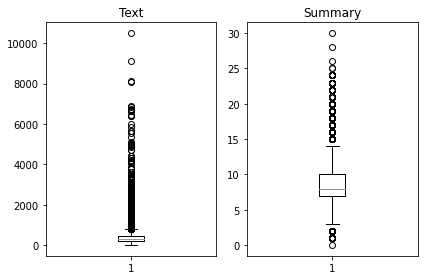

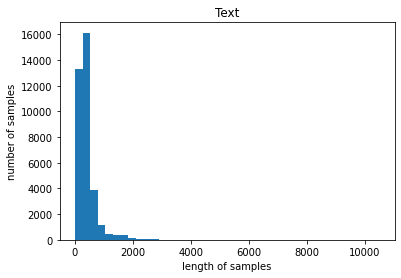

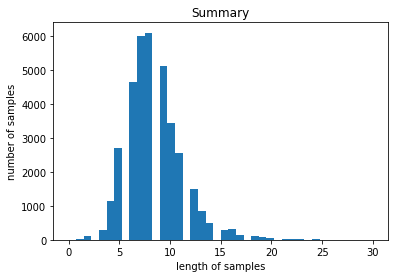

In [21]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s) for s in data['Text']]
summary_len = [len(s) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
text_max_len = 2000
summary_max_len = 25
print('=3')

=3


In [29]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [30]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 2000 이하인 샘플의 비율: 0.9932385430868973
전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.999916525223295


In [31]:
data = data[data['Text'].apply(lambda x: len(x) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35694


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 1996
텍스트의 평균 길이 : 378.73499747856783
요약의 최소 길이 : 0
요약의 최대 길이 : 25
요약의 평균 길이 : 8.288283745167256


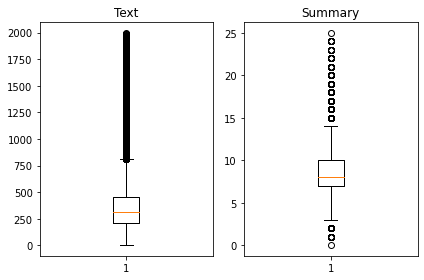

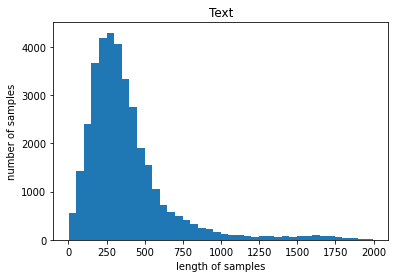

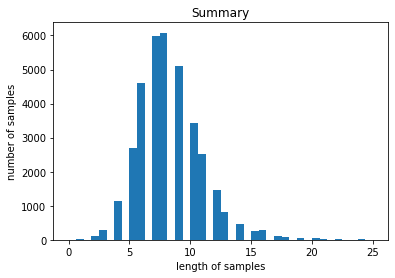

In [32]:
text_len = [len(s) for s in data['Text']]
summary_len = [len(s) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
data[data['Text'].apply(lambda x: len(x) <= 15)]

,본문,제목,Text,Summary
1619,이 기사는 내용이 없습니다.,[그림 동의보감] <17> 폐·심장 기능 높이는 방법,"[이, 기사, 는, 내용, 이, 없, 습니다]","[그림, 동의보감, 17, 폐, 심장, 기능, 높이, 는, 방법]"
2500,(2002년 1월 24일∼30일 기준),[섹션 분석] 신문사별 섹션 현황,"[2002, 년, 1, 월, 24, 일, 30, 일, 기준]","[섹션, 분석, 신문사, 별, 섹션, 현황]"
25071,.\n\n< 저작권자 ⓒ머니투데이(경제신문) >,0,"[저작, 권, 자, 머니, 투데이, 경제, 신문]",[0]
25119,KOVAnet.com에서 제공하는 일일시황입니다. \n\n==============...,[미등록주식/시황/특징주] 장외시장 시세-5월 29일,"[kovanet, com, 에서, 제공, 하, 는, 일, 일, 시황, 입니다]","[미, 등록, 주식, 시황, 특징, 주, 장외, 시장, 시세, 5, 월, 29, 일]"
26055,"14일 대전시 동구 신흥동 자택, 발인 16일 오전. (042)283-5560",[부음] 黃啓式씨(세계일보 체육부기자) 조모상,"[14, 일, 대전시, 동구, 신흥동, 자택, 발인, 16, 일, 오전, 042, ...","[부음, 씨, 세계일보, 체육부, 기자, 조, 모상]"
26206,"15일 인천 부평병원, 발인 17일 오전 10시. (02)593-1790",[부음] 康賢斗씨(서울대 언론정보학과 교수) 모친상,"[15, 일, 인천, 부평, 병원, 발인, 17, 일, 오전, 10, 시, 02, ...","[부음, 씨, 서울대, 언론, 정보, 학과, 교수, 모친상]"
26558,▲상무이사 李正吉,[인사] 한국정보통신진흥협회,"[상무, 이사]","[인사, 한국, 정보, 통신, 진흥, 협회]"
26559,▶상무 金聖起 ▶사외이사 崔尙裁 ▶상무이사 대우 李東完,[인사] 한국부동산신탁,"[상무, 사외, 이사, 상무, 이사, 대우]","[인사, 한국, 부동산, 신탁]"
26596,"* 16일 신촌세브란스병원, 발인 18일 오전 8시. (02)364-9699",[부음] 卞善郁씨(한라위니아 아이스하키팀 코치) 부친상,"[16, 일, 신촌, 세브, 란스, 병원, 발인, 18, 일, 오전, 8, 시, 0...","[부음, 씨, 한라, 위니, 아, 아이스하키, 팀, 코치, 부친상]"
26607,▲비서실장 閔泰植 ▲경영혁신팀장 李鍾達▲퇴계로지점장 직무대행 金忠在,[인사] 서울은행,"[비서, 실장, 경영, 혁신, 팀장, 퇴계로, 지점장, 직무, 대행]","[인사, 서울은행]"


In [36]:
data[data['Text'].apply(lambda x:type(x) is str)]

,본문,제목,Text,Summary


In [37]:
data = data[data['Text'].apply(lambda x: len(x) >= 15)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 35659


In [38]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Summary'].apply(lambda x : ['<sos>'] + x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ['<eos>'])
data.head()

,본문,제목,Text,Summary,decoder_input,decoder_target
0,지난 11월 9일부터 14일까지 카타르 도하에서 열린 세계무역기구(WTO) 각료...,뉴라운드 협상 이제부터다 - WTO 국민연대 장원석 집행위원장의 협상 참관기,"[지난, 11, 월, 9, 일, 부터, 14, 일, 까지, 카타르, 도하, 에서, ...","[뉴, 라운드, 협상, 이제, 부터, 다, wto, 국민연대, 장원석, 집행, 위원...","[<sos>, 뉴, 라운드, 협상, 이제, 부터, 다, wto, 국민연대, 장원석,...","[뉴, 라운드, 협상, 이제, 부터, 다, wto, 국민연대, 장원석, 집행, 위원..."
1,미 정부가 아랍권 여론 장악을 위해 5억달러를 들여 위성방송국 설립을 추진중인 ...,"미, 이슬람권 대상 방송국 설립 추진 - 본격 선전전 나서","[미, 정부, 가, 아랍, 권, 여론, 장악, 을, 위해, 5, 억, 달러, 를, ...","[미, 이슬람, 권, 대상, 방송국, 설립, 추진, 본격, 선전전, 나, 서]","[<sos>, 미, 이슬람, 권, 대상, 방송국, 설립, 추진, 본격, 선전전, 나...","[미, 이슬람, 권, 대상, 방송국, 설립, 추진, 본격, 선전전, 나, 서, <e..."
5,"기업들의 경쟁적 중국행 러시로 일본, 대만, 싱가포르, 홍콩 등 중국 주변국의 ‘산...","중국發 '산업공동화' 도래 - 한국기업 ""국내투자 NO, 중국투자 YES""","[기업, 들, 의, 경쟁, 적, 중, 국행, 러시, 로, 일본, 대만, 싱가포르, ...","[중국, 산업, 공동, 화, 도래, 한국, 기업, 국내, 투자, no, 중국, 투자...","[<sos>, 중국, 산업, 공동, 화, 도래, 한국, 기업, 국내, 투자, no,...","[중국, 산업, 공동, 화, 도래, 한국, 기업, 국내, 투자, no, 중국, 투자..."
6,영국의 경제전문지 파이낸셜타임스가 18일(현지시간) 우리나라의 차세대전투기(FX...,"한국 국방부, 미 보잉사 위해 로비? - 파이낸셜타임스 보도","[영국, 의, 경제, 전문지, 파이낸셜, 타임스, 가, 18, 일, 현지, 시간, ...","[한국, 국방부, 미, 보잉, 사, 위해, 로비, 파이낸셜, 타임스, 보도]","[<sos>, 한국, 국방부, 미, 보잉, 사, 위해, 로비, 파이낸셜, 타임스, 보도]","[한국, 국방부, 미, 보잉, 사, 위해, 로비, 파이낸셜, 타임스, 보도, <eos>]"
7,다음은 미 시애틀에서 발행되는 시애틀 포스트-인텔리젠서의 18일자 사설 ‘석유와...,미국의 석유의존이 9.11 불렀다 - 평화ㆍ생태보전 원한다면 석유의존 줄여라,"[다음, 은, 미, 시애틀, 에서, 발행, 되, 는, 시애틀, 포스트, 인텔리, 젠...","[미국, 의, 석유, 의존, 이, 9, 11, 불렀, 다, 평화, 생태, 보전, 원...","[<sos>, 미국, 의, 석유, 의존, 이, 9, 11, 불렀, 다, 평화, 생태...","[미국, 의, 석유, 의존, 이, 9, 11, 불렀, 다, 평화, 생태, 보전, 원..."


In [39]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [40]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[ 7626 15632 23643 ... 23358 22691 19303]


In [41]:
what = np.arange(50)
what

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [43]:
encoder_input[[3,1,2]]

array([list(['영국', '의', '경제', '전문지', '파이낸셜', '타임스', '가', '18', '일', '현지', '시간', '우리나라', '의', '차세대', '전투기', 'fx', '선정', '과정', '에', '우리', '나라', '의', '국방부', '가', '미국', '보잉', '사', '의', 'f', '15', '를', '위해', '로비', '를', '하', '고', '있', '는', '것', '으로', '생각', '되', '며', '청와대', '도', '미국', '과', '의', '동맹', '관계', '손상', '을', '우려', '해', '마', '지', '못해', '끌려가', '는', '분위기', '라고', '보도', '해', '큰', '물의', '를', '빚', '고', '있', '다', '이', '보도', '가', '사실', '로', '드러날', '경우', '4', '조', '3', '천억', '원', '규모', '의', '천문학', '적', '예산', '이', '걸린', 'fx', '선정', '작업', '의', '객관', '성', '이', '국제', '적', '으로', '의문시', '될', '뿐', '아니', '라', '한', '나라', '의', '국방부', '가', '외국', '방위', '산업체', '의', '로비스트', '로', '전락', '한', '대목', '역시', '향후', '정치', '문제', '화', '할', '가능', '성', '이', '농후', '하', '기', '때문', '이', '다', '문제', '의', '파이낸셜', '타임스', '는', 'fx', '선정', '작업', '에', '입찰', '을', '하', '고', '있', '는', '유럽', '쪽', '언론', '이', '라는', '점', '에서', '유의', '할', '대목', '이', '있', '으나', '국방부', '와', '청와대', '는', '이', '같', '은', '의혹', '에', '해명', '하', '기', '위해서', '라도',

In [44]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [45]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 7131


In [46]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 28528
훈련 레이블의 개수 : 28528
테스트 데이터의 개수 : 7131
테스트 레이블의 개수 : 7131


In [47]:
hi = Tokenizer()
hi.fit_on_sequences([['안녕', '나는','해창이야'],['이렇게','하는','건가?']])

In [50]:
decoder_target_train

array([list(['동양', '애드', '컴', '인도', '정보', '통신', '인력', '국내', '고용', '추진', '<eos>']),
       list(['미', '경제', '금리', '인상', '여파', '로', '둔화', '조짐', '<eos>']),
       list(['일반', '현대차', '발표', '지연', 'mk', '고민', '중', '5', '보', '<eos>']),
       ...,
       list(['쌍용', '정보', '정보', '시스템', '품질', '경진', '대회', '개최', '<eos>']),
       list(['육군', '성', '관련', '군기', '문란', '처벌', '강화', '<eos>']),
       list(['연재소설', '강안', '남자', '206', '대망', '4', '<eos>'])],
      dtype=object)

In [76]:
tokenizer = Tokenizer() # 토크나이저 정의
tokenizer.fit_on_texts(hi := encoder_input_train+decoder_input_train +decoder_target_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

=3


In [78]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 105146
등장 빈도가 2번 이하인 희귀 단어의 수: 50381
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 54765
단어 집합에서 희귀 단어의 비율: 47.91527970631312
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5679639021947266


In [90]:
src_vocab = 110000
# tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 180,000으로 제한
# tokenizer.fit_on_texts(hi) # 단어 집합 재생성
# print('=3')

In [80]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train_tenser = tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test_tenser = tokenizer.texts_to_sequences(encoder_input_test)
decoder_input_train_tenser = tokenizer.texts_to_sequences(decoder_input_train)
decoder_input_test_tenser = tokenizer.texts_to_sequences(decoder_input_test)


# 잘 진행되었는지 샘플 출력
print(encoder_input_train_tenser[:3])

[[58, 83, 8009, 54, 1091, 5, 3698, 350, 125, 26, 41464, 1293, 160, 5, 108, 7941, 26, 2338, 8663, 2228, 7, 197, 133, 6504, 269, 5, 8459, 3, 1092, 8, 29, 116, 1091, 133, 182, 804, 5, 197, 1358, 3, 198, 8, 10, 11, 36, 285, 20, 95, 4, 2338, 8663, 2228, 7, 1, 6, 145, 293, 329, 49, 629, 30, 91, 49, 746, 40, 50, 91, 49, 5, 1091, 133, 182, 804, 3, 197, 6, 708, 1295, 147, 1, 4, 2338, 8663, 2228, 7, 1, 804, 17, 3, 1, 183, 12, 815, 9, 1510, 7, 98, 87, 400, 94, 6, 497, 27, 150, 1, 4, 2338, 8663, 2228, 7, 107, 746, 40, 68, 344, 6, 207, 87, 5, 133, 182, 350, 220, 3, 643, 133, 6504, 269, 12, 233, 19, 8, 2, 404, 804, 3, 2621, 27, 147, 1, 51, 95, 4, 41464, 1293, 7, 43, 180, 149, 121, 87, 221, 18, 30, 91, 586, 87, 5, 350, 577, 9, 315, 8, 10, 11, 2, 180, 24, 26, 3698, 350, 220, 1, 4, 8010, 120, 65, 64, 76, 69, 78, 47, 48, 79, 75, 86, 82, 71, 72, 66, 43, 31, 31, 62, 84, 77, 25], [725, 83, 81, 50, 42, 88, 5, 311, 4178, 296, 12, 196, 192, 42, 212, 73, 506, 33, 6, 3343, 9, 279, 32, 1359, 438, 411, 1850, 2550

In [81]:
decoder_target_train_tenser = tokenizer.texts_to_sequences(decoder_target_train)
decoder_target_test_tenser = tokenizer.texts_to_sequences(decoder_target_test)


In [82]:
# tar_tokenizer = Tokenizer()
# tar_tokenizer.fit_on_texts(decoder_input_train)
# print('=3')

In [83]:
# threshold = 3
# total_cnt = len(tar_tokenizer.word_index) # 단어의 수
# rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
# total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
# rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# # 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
# for key, value in tar_tokenizer.word_counts.items():
#     total_freq = total_freq + value

#     # 단어의 등장 빈도수가 threshold보다 작으면
#     if(value < threshold):
#         rare_cnt = rare_cnt + 1
#         rare_freq = rare_freq + value

# print('단어 집합(vocabulary)의 크기 :', total_cnt)
# print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
# print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
# print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
# print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [84]:
# set(tar_tokenizer.index_word.values()) - set(src_tokenizer.index_word.values())

In [85]:
# tar_vocab = 10000
# tar_tokenizer = Tokenizer(num_words=tar_vocab) 
# tar_tokenizer.fit_on_texts(decoder_input_train)
# tar_tokenizer.fit_on_texts(decoder_target_train)

# # 텍스트 시퀀스를 정수 시퀀스로 변환
# decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
# decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
# decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
# decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# # 잘 변환되었는지 확인
# print('input')
# print('input ',decoder_input_train[:5])
# print('target')
# print('decoder ',decoder_target_train[:5])

In [86]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 1
훈련 데이터의 개수 : 28528
훈련 레이블의 개수 : 28528
테스트 데이터의 개수 : 7130
테스트 레이블의 개수 : 7130


In [87]:
encoder_input_train = pad_sequences(encoder_input_train_tenser, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test_tenser, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train_tenser, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train_tenser, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test_tenser, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test_tenser, maxlen=summary_max_len, padding='post')
print('=3')

=3


In [88]:
import tensorflow as tf
# tf.debugging.set_log_device_placement(False)

In [91]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
# encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
# encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [92]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(src_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [93]:
# 디코더의 출력층
decoder_softmax_layer = Dense(src_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 128)    14080000    input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 2000, 256),  394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [94]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(src_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 128)    14080000    input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 2000, 256),  394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

hi


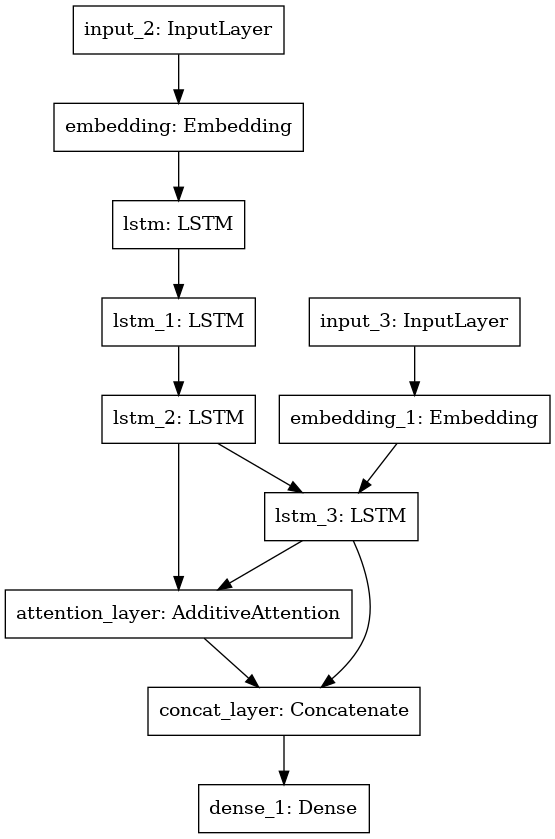

In [100]:
print('hi')
from tensorflow.keras.utils import plot_model
plot_model(model)

In [96]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=32, callbacks=[es], epochs=50)

Epoch 1/50
892/892 [==============================] - 616s 659ms/step - loss: 2.8864 - val_loss: 2.6543
Epoch 2/50
892/892 [==============================] - 589s 661ms/step - loss: 2.6209 - val_loss: 2.5595
Epoch 3/50
892/892 [==============================] - 589s 661ms/step - loss: 2.5089 - val_loss: 2.4628
Epoch 4/50
892/892 [==============================] - 590s 661ms/step - loss: 2.4259 - val_loss: 2.4156
Epoch 5/50
892/892 [==============================] - 590s 661ms/step - loss: 2.3642 - val_loss: 2.3765
Epoch 6/50
892/892 [==============================] - 590s 662ms/step - loss: 2.3088 - val_loss: 2.3463
Epoch 7/50
892/892 [==============================] - 590s 662ms/step - loss: 2.2655 - val_loss: 2.3289
Epoch 8/50
892/892 [==============================] - 590s 661ms/step - loss: 2.2290 - val_loss: 2.3081
Epoch 9/50
892/892 [==============================] - 590s 661ms/step - loss: 2.1974 - val_loss: 2.2995
Epoch 10/50
892/892 [==============================] - 590s 662m

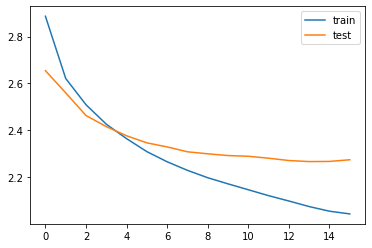

In [98]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [99]:
index_to_word = tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
word_to_index = tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
# tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

=3


In [101]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


In [102]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('=3')

=3


In [109]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = word_to_index['<sos>']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = index_to_word[sampled_token_index]

        if (sampled_token!='<eos>'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == '<eos>'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('=3')

=3


In [110]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=word_to_index['<sos>']) and i!=word_to_index['<eos>']):
            temp = temp + index_to_word[i] + ' '
    return temp

print('=3')

=3


In [111]:
for i in range(50, 55):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : 서울 연합뉴스 이윤영 기자 여행 업과 인터넷 의 접목 을 시도 하 며 우후죽순 처럼 생겨났 던 인터넷 전문 여행사 들 이 오프라인 쪽 으로 마케팅 전략 을 대폭 수정 하 고 있 다 대부분 지난해 말 등장 해 올해 여름 첫 사업 시즌 을 맞 은 인터넷 여행 업체 들 이 최근 일 고 있 는 닷컴 기업 위기 론 과 함께 오프라인 에서 의 탄탄 한 마케팅 없이 는 뚜렷 한 수익 을 내 기 힘들 다는 판단 에 직면 했 기 때문 이 다 3 일 여행 업계 에 따르 면 온라인 여행 업 을 표방 했 던 워너 투어 닷컴 골드 투어 등 인터넷 업체 들 은 신문 광고 오프라인 업체 와 의 제휴 등 전통 적 인 오프라인 영업 방식 을 강화 하 는 방향 으로 마케팅 전략 을 수정 했 다 지난 2 월 부터 온라인 맞춤 여 행업 을 본격 적 으로 시작 했 던 워너 투어 닷컴 은 최근 오프라인 업체 로 의 전환 을 선언 하 며 온라인 사업 계획 을 잠정 보류 했 다 이 에 따라 인터넷 기술직 직원 도 7 명 에서 2 명 으로 줄이 고 맞춤 여행 콘텐츠 제공 을 위한 전문 홈페이지 런 칭 계획 도 당분간 중단 하 기 로 했 다 대신 대학교 등 을 직접 돌아다니 며 여행 상품 설 명회 를 개최 하 는 등 오프라인 홍보 를 강화 하 고 특화 된 지역 고객 을 대상 으로 하 는 차별 화 된 상품 기획 에 치중 할 것 이 라고 워너 투어 는 밝혔 다 골드 투어 는 지난 6 7 월 성수기 에 7 개 일간지 에 5 단 크기 로 여행 상품 모 객 광고 를 내보냈 다 신문 광고 는 오프라인 여행사 들 의 전통 적 인 홍보 수단 으로 온라인 업체 들 은 시도 하 지 않 았 던 방법 이 다 골드 투어 는 이 와 함께 여행 상품 도매 업체 인 여행 명가 와 업무 제휴 를 맺 고 여행사 뿐 아니 라 숙박 업체 렌터카 업체 등 과 도 제휴 를 추진 오프라인 영업 수단 확보 에 열 을 올리 고 있 다 웹투어 는 지난달 여행사 로 는 처음 으로 경주 의 코 레스코 가족 콘도 를 인수 해 눈길 을 끌 었 다 여

In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [ ]:
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [ ]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [ ]:
from importlib.metadata import version
import nltk
import tensorflow
import summa

print(nltk.__version__)
print(tensorflow.__version__)
print(version('summa'))

3.6.5
2.6.0
1.2.0


In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
data.sample(10)

,headlines,text
26407,Pumps in Thai cave failed just after last boy ...,The water pumps draining the flooded cave in T...
47358,Shoaib Akhtar named brand ambassador of Pak Cr...,Former Pakistani fast bowler Shoaib Akhtar has...
35085,2 wickets in 2 balls happen twice in the same ...,"During the MI-RCB IPL match on Tuesday, two wi..."
14139,WhatsApp sets up system to store payments data...,Facebook-owned messaging service WhatsApp has ...
22052,Bajaj Electricals MD Anant Bajaj passes away a...,The Managing Director (MD) of Bajaj Electrical...
42296,Russia supplying arms to the Taliban: US,"The Commander of US forces in Afghanistan, Gen..."
62012,Bitcoin not to be used for payments for now: R...,Executive Director of Reserve Bank of India S ...
27758,Instagram may let users ask questions in Stories,Facebook-owned photo-sharing app Instagram is ...
45404,Who are the nominees for Best Actor at Oscars ...,Denzel Washington is among the nominees for th...
18323,BJP govt is India's most non-performing asset:...,"Ahead of the release of his new book, senior C..."
